In [40]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

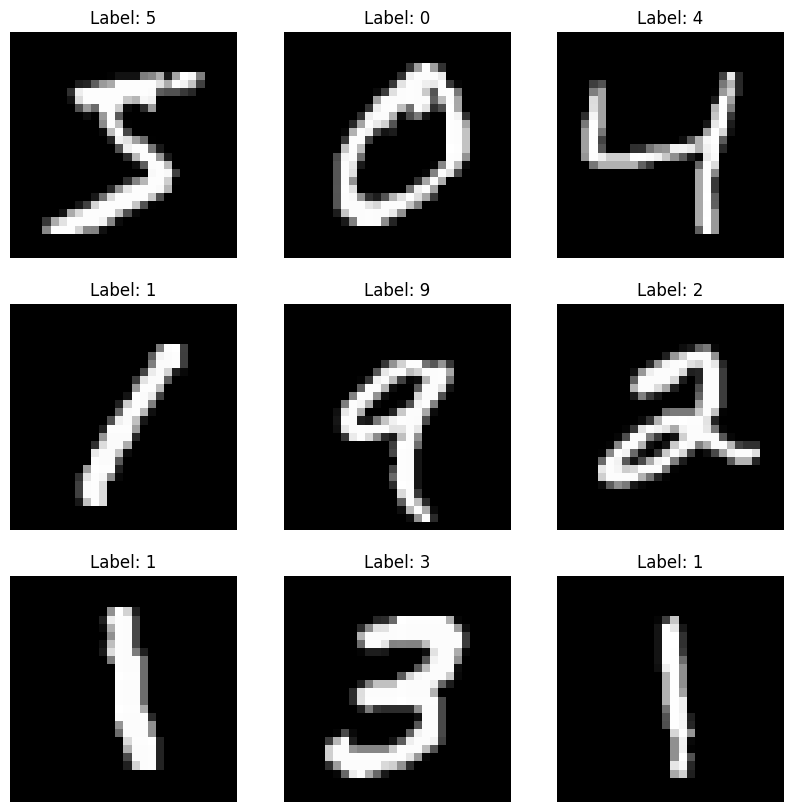

In [42]:
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(10,10))
for i in range(9): 
    plt.subplot(3, 3, i+1)  
    plt.imshow(x_train[i], cmap="gray")  
    plt.title(f"Label: {class_names[y_train[i]]}") 
    plt.axis('off') 
plt.show()


In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [48]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalizando as imagens

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [54]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))  # Flatten para transformar as imagens 2D em 1D
model.add(Dense(64, activation='relu'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(10, activation='softmax'))   # a saída deve ser 10 neurônios porque tem 10 classes


c:\Users\Caio Lacerda\Desktop\APPS\Exercícios\venv_312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Caio Lacerda\Desktop\APPS\Exercícios\venv_312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [55]:
model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=0.01),
    metrics=[CategoricalAccuracy()]
)

In [58]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=0),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=0)
]

model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9754 - loss: 0.0751 - val_categorical_accuracy: 0.9560 - val_loss: 0.1654
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9773 - loss: 0.0755 - val_categorical_accuracy: 0.9645 - val_loss: 0.1324
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9778 - loss: 0.0719 - val_categorical_accuracy: 0.9645 - val_loss: 0.1352
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.9779 - loss: 0.0696 - val_categorical_accuracy: 0.9647 - val_loss: 0.1362
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.9793 - loss: 0.0646 - val_categorical_accuracy: 0.9634 - val_loss: 0.1405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.9792 - loss: 0.0633 - val_categorical_accuracy: 0.9591 - val_loss: 0.1553
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.9799 - los

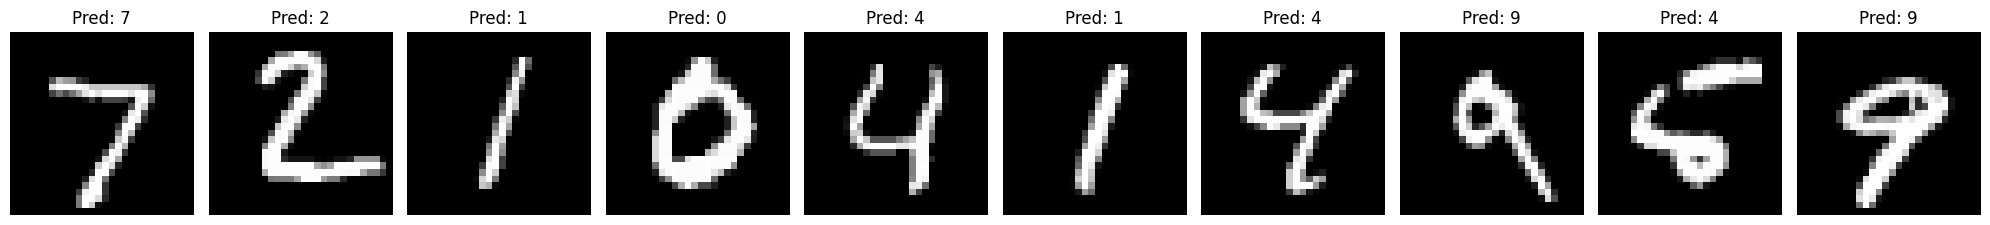

In [70]:
import numpy as np

num_figures = 10

fig, axs = plt.subplots(ncols=num_figures, nrows=1)
fig.set_size_inches(20, 10)

for image_index, axe in enumerate(axs):
    axe.imshow(x_test[image_index], cmap='gray')

    x_reshaped = x_test[image_index].reshape((1, 28, 28))
    prediction = model.predict(x_reshaped, verbose=0)

    axe.set_title(f"Pred: {class_names[np.argmax(prediction)]}")

    axe.set_xlabel(f"Real: {class_names[np.argmax(y_test[image_index])]}")

    axe.axis('off')

plt.tight_layout()
plt.show()